core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


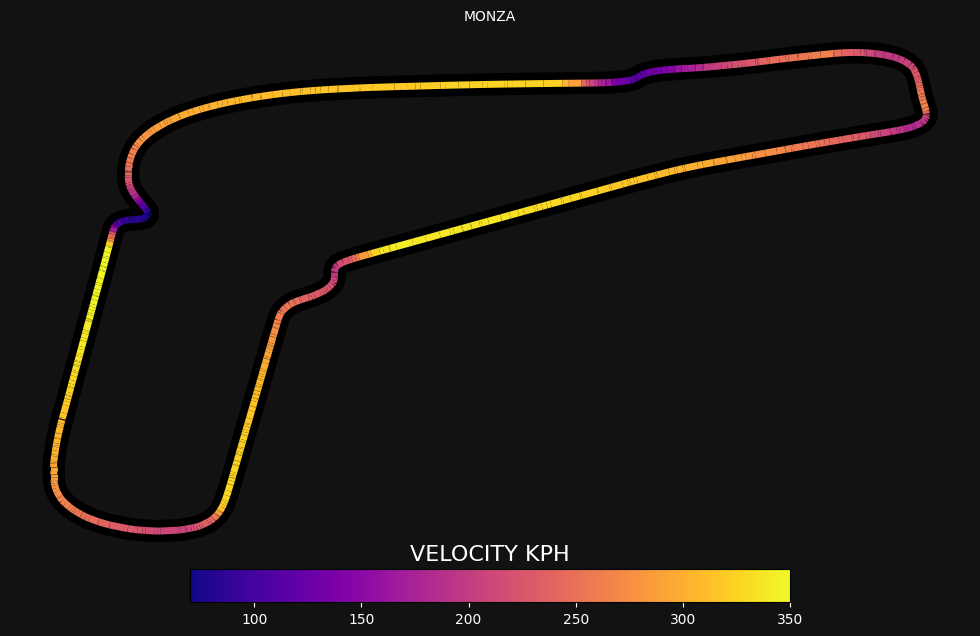

In [21]:

import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

colormap = mpl.cm.plasma
track = 'MONZA'
session = ff1.get_session(2023, track, 'Q')
session.load()
lap = session.laps.pick_fastest()

x = lap.telemetry['X']              
y = lap.telemetry['Y']              
color = lap.telemetry['Speed']     

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

lc.set_array(color)
line = ax.add_collection(lc)
cbaxes = fig.add_axes([0.25,0.05, 0.5, 0.05])
ax.set_title(track, color='white', fontsize=10)
cbaxes.set_title('VELOCITY KPH', fontsize=16, color='white')
cbaxes.tick_params(axis='x', colors='white')
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
ax.set_facecolor('#121212')
fig.patch.set_facecolor('#121212')  
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

plt.show()
